In [2]:
# Import required modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns  # importing seaborn modifies basic matplotlib styles
from datetime import datetime, timedelta, timezone
from dateutil.parser import parse
from matplotlib.dates import DateFormatter
import glob
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()

## Traffic Volumes

Traffic volume data was provided by Suffolk County Council from a sensor on Compeigne Way in Bury St Edmunds.

It was provided as annual excel spreadsheets with a tab per week containing hourly readings of south, north and total flow traffic volumes.

Hourly total flow readings from 1 September 2020 - 31 August 2022 were copied into a csv file and used below.

In [3]:
# Read in weekly traffic data, parse dates and create new DateTime column, format to day, month, year

df_traffic21_22 = pd.read_csv('/Users/lisaleggett/Documents/Uni/Python/NZIP/Traffic/Week_2021_2022.csv', parse_dates={'DateTime':['Date', 'Time']}, dayfirst=True)

# Set the DateTime column as index
df_traffic21_22.set_index('DateTime', inplace=True)

# Summarise traffic data 
print(df_traffic21_22.describe().round(decimals=2))
print(df_traffic21_22)


         Volume
count  17502.00
mean     724.48
std      583.36
min        0.00
25%      122.00
50%      604.00
75%     1296.00
max     1901.00
                     Volume
DateTime                   
2020-09-01 00:00:00    40.0
2020-09-01 01:00:00    25.0
2020-09-01 02:00:00    22.0
2020-09-01 03:00:00    36.0
2020-09-01 04:00:00    43.0
...                     ...
2022-08-31 19:00:00   876.0
2022-08-31 20:00:00   596.0
2022-08-31 21:00:00   411.0
2022-08-31 22:00:00   271.0
2022-08-31 23:00:00   136.0

[17520 rows x 1 columns]


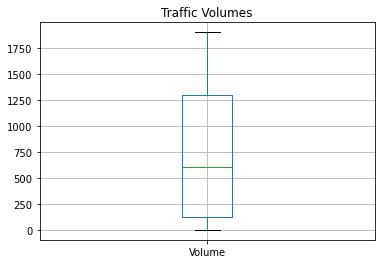

In [4]:
# Show traffic summary as a boxplot

df_traffic21_22.boxplot()
plt.title("Traffic Volumes")
plt.show()

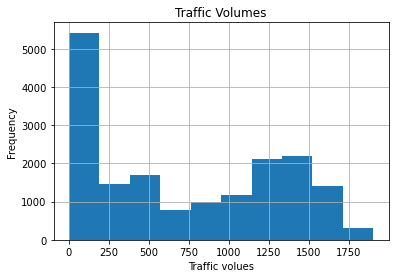

In [5]:
# Show traffic summary as a histogram
df_traffic21_22.hist(bins=10)
plt.xlabel("Traffic volues")
plt.ylabel("Frequency")
plt.title("Traffic Volumes")
plt.show()

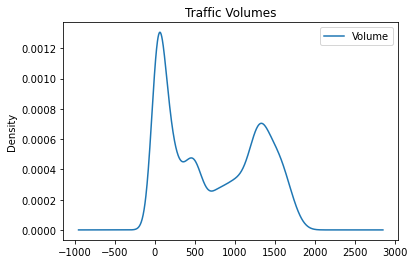

In [6]:
# Show traffic summary density estimate
df_traffic21_22.plot.kde()
plt.title("Traffic Volumes")
plt.show()

In [7]:
# Create monthly volumes
volumes = df_traffic21_22['Volume']

traff_0920 = volumes.loc['2020-09']
traff_1020 = volumes.loc['2020-10']
traff_1120 = volumes.loc['2020-11']
traff_1220 = volumes.loc['2020-12']
traff_0121 = volumes.loc['2021-01']
traff_0221 = volumes.loc['2021-02']
traff_0321 = volumes.loc['2021-03']
traff_0421 = volumes.loc['2021-04']
traff_0521 = volumes.loc['2021-05']
traff_0621 = volumes.loc['2021-06']
traff_0721 = volumes.loc['2021-07']
traff_0821 = volumes.loc['2021-08']
traff_0921 = volumes.loc['2021-09']
traff_1021 = volumes.loc['2021-10']
traff_1121 = volumes.loc['2021-11']
traff_1221 = volumes.loc['2021-12']
traff_0122 = volumes.loc['2022-01']
traff_0222 = volumes.loc['2022-02']
traff_0322 = volumes.loc['2022-03']
traff_0422 = volumes.loc['2022-04']
traff_0522 = volumes.loc['2022-05']
traff_0622 = volumes.loc['2022-06']
traff_0722 = volumes.loc['2022-07']
traff_0822 = volumes.loc['2022-08']

# Create yearly volumes

traff_20_21 = pd.concat([traff_0920, traff_1020, traff_1120, traff_1220, traff_0121, traff_0221,
                       traff_0321, traff_0421, traff_0521, traff_0621, traff_0721, traff_0821])

traff_21_22 = pd.concat([traff_0921, traff_1021, traff_1121, traff_1221, traff_0122, traff_0222,
                       traff_0322, traff_0422, traff_0522, traff_0622, traff_0722, traff_0822])


Text(0.5, 1.0, '2021/22')

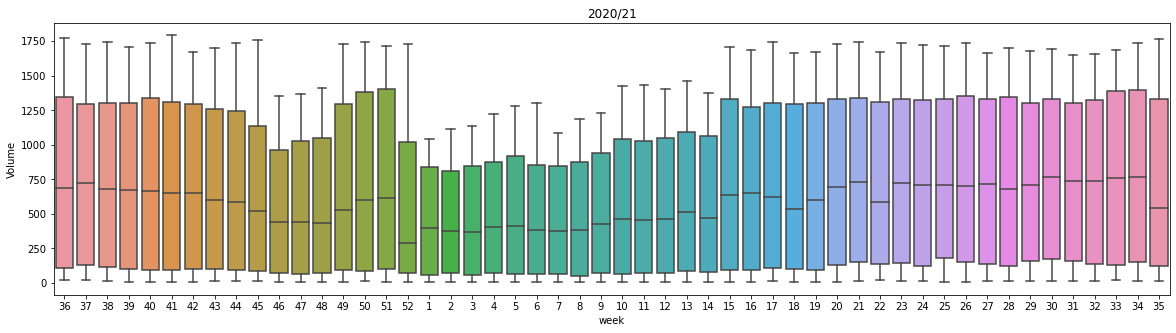

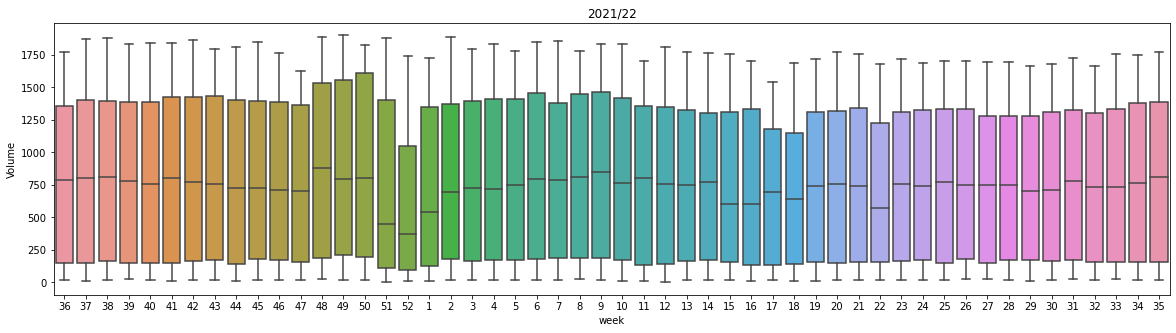

In [8]:
# Plot weekly traffic for each year

# Boxplot for 2020/21

# Set the order of weeks to start at week 36 (1st August)
myorder = list(range(36,53))+list(range(1,36)) # NB range excludes final number (53 and 36) 

fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = traff_20_21.index.isocalendar().week, # obtaining week number
            y = traff_20_21,
            order = myorder,
            ax = ax)
ax.set_title('2020/21')

# Boxplot for 2021/22
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x = traff_21_22.index.isocalendar().week, # obtaining week number
            y = traff_21_22,
            order = myorder,
            ax = ax)
ax.set_title('2021/22')

## Lockdown impact on traffic volumes

Traffic volumes were visualised alongside lockdown dates to ascertain any correlation

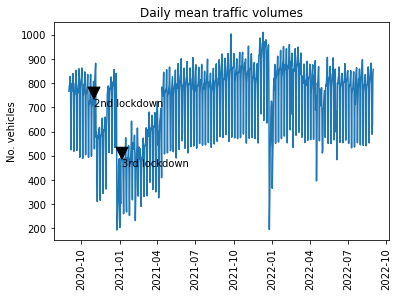

In [9]:
# Resample to daily and plot

df_traffic21_22_dly = df_traffic21_22.resample('D')
df_traffic21_22_dly_mean = df_traffic21_22_dly.mean()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_traffic21_22_dly_mean)
plt.xticks(rotation=90)
ax.set_ylabel('No. vehicles')
ax.set_title('Daily mean traffic volumes')


ldowns = [
    (datetime(2020, 10, 31, tzinfo=None), '2nd lockdown'),
    (datetime(2021, 1, 6, tzinfo=None), '3rd lockdown')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, df_traffic21_22_dly_mean.asof(date) + 2),
    xytext=(date, df_traffic21_22_dly_mean.asof(date) + 4),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='top')

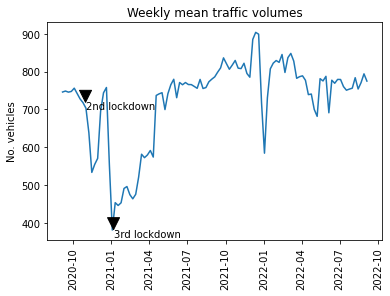

In [10]:
# Resample to weekly and plot

df_traffic21_22_wkly = df_traffic21_22.resample('W')
df_traffic21_22_wkly_mean = df_traffic21_22_wkly.mean()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_traffic21_22_wkly_mean)
plt.xticks(rotation=90)
ax.set_ylabel('No. vehicles')
ax.set_title('Weekly mean traffic volumes')

ldowns = [
    (datetime(2020, 10, 31, tzinfo=None), '2nd lockdown'),
    (datetime(2021, 1, 6, tzinfo=None), '3rd lockdown')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, df_traffic21_22_wkly_mean.asof(date) + 1),
    xytext=(date, df_traffic21_22_wkly_mean.asof(date) + 3),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='top')

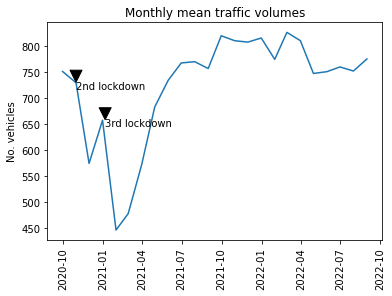

In [11]:
# Resample to monthly and plot

df_traffic21_22_mnthly = df_traffic21_22.resample('M')
df_traffic21_22_mnthly_mean = df_traffic21_22_mnthly.mean()

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_traffic21_22_mnthly_mean)
plt.xticks(rotation=90)
ax.set_ylabel('No. vehicles')
ax.set_title('Monthly mean traffic volumes')

ldowns = [
    (datetime(2020, 10, 31, tzinfo=None), '2nd lockdown'),
    (datetime(2021, 1, 6, tzinfo=None), '3rd lockdown')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, df_traffic21_22_mnthly_mean.asof(date) + 1),
    xytext=(date, df_traffic21_22_mnthly_mean.asof(date) + 3),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='top')

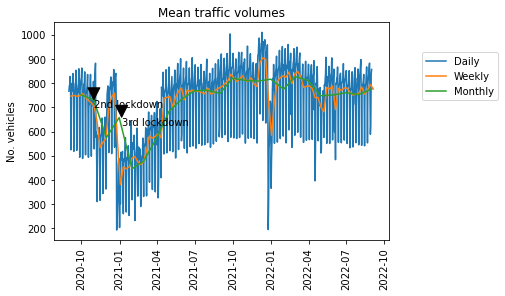

In [12]:
# Plot on one graph


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(df_traffic21_22_dly_mean, label='Daily')
ax.plot(df_traffic21_22_wkly_mean, label='Weekly')
ax.plot(df_traffic21_22_mnthly_mean, label='Monthly')
plt.xticks(rotation=90)
ax.legend(bbox_to_anchor=(1.01, 1), borderaxespad=3) # place legend outside plot
ax.set_ylabel('No. vehicles')
ax.set_title('Mean traffic volumes')

ldowns = [
    (datetime(2020, 10, 31, tzinfo=None), '2nd lockdown'),
    (datetime(2021, 1, 6, tzinfo=None), '3rd lockdown')
]

for date, label in ldowns:
    ax.annotate(label, xy=(date, df_traffic21_22_mnthly_mean.asof(date) + 1),
    xytext=(date, df_traffic21_22_mnthly_mean.asof(date) + 3),
    arrowprops=dict(facecolor='black'),
    horizontalalignment='left', verticalalignment='top')

## Christmas/New Year impact on traffic volumes

Analysis focussed on December figures as they show the greatest variation

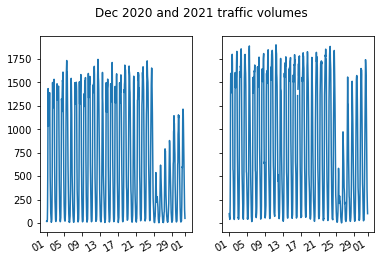

In [13]:
# Plot Dec 20 and Dec 21 traffic volumes

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # plot 2 subplots to share same Y axis
fig.suptitle('Dec 2020 and 2021 traffic volumes')
ax1.plot(traff_1220, label='2020')
ax2.plot(traff_1221, label='2021')
myFmt = DateFormatter("%d") # format dates to only show day
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate() # auto rotate for easier reading

Similar patterns for December for each year can be seen, with quieter periods over/just after Christmas as expected.  December 2021 had higher traffic volumes than December 2020. 

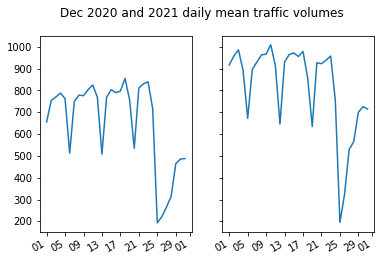

In [14]:
# Plot Dec 20 and Dec 21 daily mean volumes

# Resample to daily

df_Dec20_dly = traff_1220.resample('D')
df_Dec20_dly_mean = df_Dec20_dly.mean()

df_Dec21_dly = traff_1221.resample('D')
df_Dec21_dly_mean = df_Dec21_dly.mean()

fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True) # plot 2 subplots to share same Y axis
fig.suptitle('Dec 2020 and 2021 daily mean traffic volumes')
ax1.plot(df_Dec20_dly_mean, label='2020')
ax2.plot(df_Dec21_dly_mean, label='2021')
myFmt = DateFormatter("%d") # format dates to only show day
ax1.xaxis.set_major_formatter(myFmt)
ax2.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate() # auto rotate for easier reading

Text(0.5, 1.0, 'December 2021 traffic volumes')

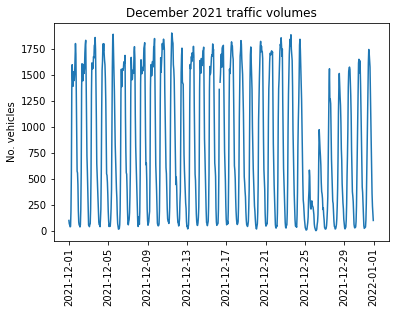

In [15]:
# Plot December 2021 volumes

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.plot(traff_1221, label='December 2021')
plt.xticks(rotation=90)
ax.set_ylabel('No. vehicles')
ax.set_title('December 2021 traffic volumes')

In [16]:
# Establish dates/times of highest 25% traffic volumes

df_traffic_top75 = df_traffic21_22.loc[df_traffic21_22['Volume'] >= 1296.00]
df_traffic_top75

,Volume
DateTime,
2020-09-01 11:00:00,1333.0
2020-09-01 12:00:00,1342.0
2020-09-01 13:00:00,1357.0
2020-09-01 14:00:00,1362.0
2020-09-01 15:00:00,1446.0
...,...
2022-08-31 13:00:00,1513.0
2022-08-31 14:00:00,1501.0
2022-08-31 15:00:00,1559.0
